In [1]:
import pandas as pd
import altair as alt

In [2]:
df_games = pd.read_csv("vgsales.csv")
df_games.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


# histogram of game count by year

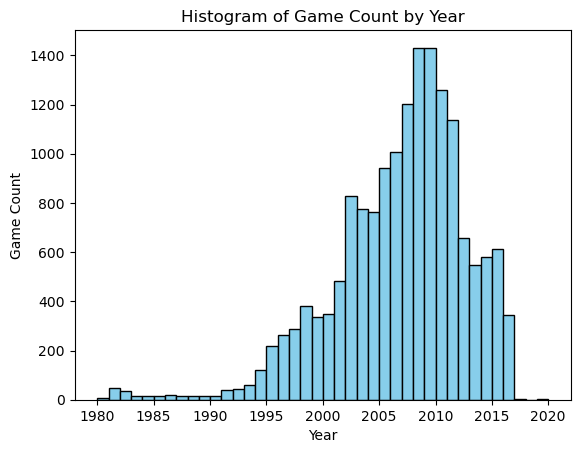

In [8]:
import matplotlib.pyplot as plt

plt.hist(df_games['Year'], bins=40, color='skyblue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Game Count')
plt.title('Histogram of Game Count by Year')

plt.savefig('histogram_game_count_by_year.png')

plt.show()

# interactive bar chart

In [6]:
sale_per_year = df_games.groupby('Year')[["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales"]].sum().reset_index()
sale_per_year.head()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,1980.0,10.59,0.67,0.00,0.12
1,1981.0,33.40,1.96,0.00,0.32
2,1982.0,26.92,1.65,0.00,0.31
3,1983.0,7.76,0.80,8.10,0.14
4,1984.0,33.28,2.10,14.27,0.70


In [7]:
data = {
    'Country': ['USA', 'Canada'],
    '2000': [100, 150],
    '2010': [120, 180],
    '2020': [130, 200]
}
df = pd.DataFrame(data)

# Melt the DataFrame
df_melted = df.melt(id_vars='Country', var_name='Year', value_name='Population')

print(df_melted)

  Country  Year  Population
0     USA  2000         100
1  Canada  2000         150
2     USA  2010         120
3  Canada  2010         180
4     USA  2020         130
5  Canada  2020         200


In [8]:
import altair as alt
from vega_datasets import data

source = data.barley()

source.head()

,yield,variety,year,site
0,27.00000,Manchuria,1931,University Farm
1,48.86667,Manchuria,1931,Waseca
2,27.43334,Manchuria,1931,Morris
3,39.93333,Manchuria,1931,Crookston
4,32.96667,Manchuria,1931,Grand Rapids


# Semi Circle Donut Plot

In [9]:
stacked_data = pd.melt(sale_per_year, id_vars='Year', var_name="Region", value_name="Sales")

# add slider
slider = alt.binding_range(min=1980, max=2016, step=1, name="Year: ")
selection = alt.selection_single(fields=['Year'], bind=slider, value=1980)

# Condition for color and border
color = alt.Color('Region:N', scale=alt.Scale(
    domain=['NA_Sales', 'JP_Sales', 'EU_Sales', 'Other_Sales'],
    range=['#1a9850', '#d73027', '#4575b4', '#806b71']
))

#color = alt.Color('Region:N')
stroke_color = alt.condition(selection, alt.value("red"), alt.value("transparent"))
stroke_width = alt.condition(selection, alt.value(1.5), alt.value(0))

base_chart = alt.Chart(stacked_data).mark_bar().encode(
    x='Year:O',
    y='sum(Sales)',
    color=color,
    stroke=stroke_color,
    strokeWidth=stroke_width,
    tooltip=["Year", "Region", "Sales"],
)

# bar chart for sales by region for the selected year
bar_chart = alt.Chart(sale_per_year).mark_bar().encode(
    x = "Region:N",
    y = "Sales:Q",
    color=alt.Color('Region:N', scale=alt.Scale(scheme='category20')),
    tooltip=['Region:N', 'Sales:Q'],
).transform_calculate(
    Region="datum.key",
    Sales="datum.value"
).transform_fold(
    ['NA_Sales', 'JP_Sales', 'EU_Sales', "Other_Sales"],
    as_=['Region', 'Sales']
).transform_filter(
    selection
).properties(
    title="Video Game Sales by Region"
)

stacked_bar = base_chart.add_selection(
    selection
).properties(
    width=600,
    title='Total Sales by Year with Region Contribution (Stacked Bar)'
)

combined = stacked_bar | bar_chart
combined

/Users/flora_hou/opt/anaconda3/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'

/Users/flora_hou/opt/anaconda3/lib/python3.9/site-packages/altair/utils/deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.HConcatChart(...)

In [10]:
combined.save('combined_chart.html')